### Umbral de clasificación

¿Qué podemos hacer para optimizar el entrenamiento de la regresión logística? Deberíamos echar un vistazo a cómo funciona internamente.

Para determinar la respuesta, la regresión logística calcula la probabilidad de cada clase. Dado que solo tenemos dos clases (cero y uno), la probabilidad de la clase "1" es la que nos interesa. Esta probabilidad varía de cero a uno: si es mayor a 0.5, la observación se clasifica como positiva; si es menor, como negativa.

El punto de corte entre clasificaciones positivas y negativas se llama umbral. Por defecto es 0.5, pero ¿qué tal si lo cambiamos?


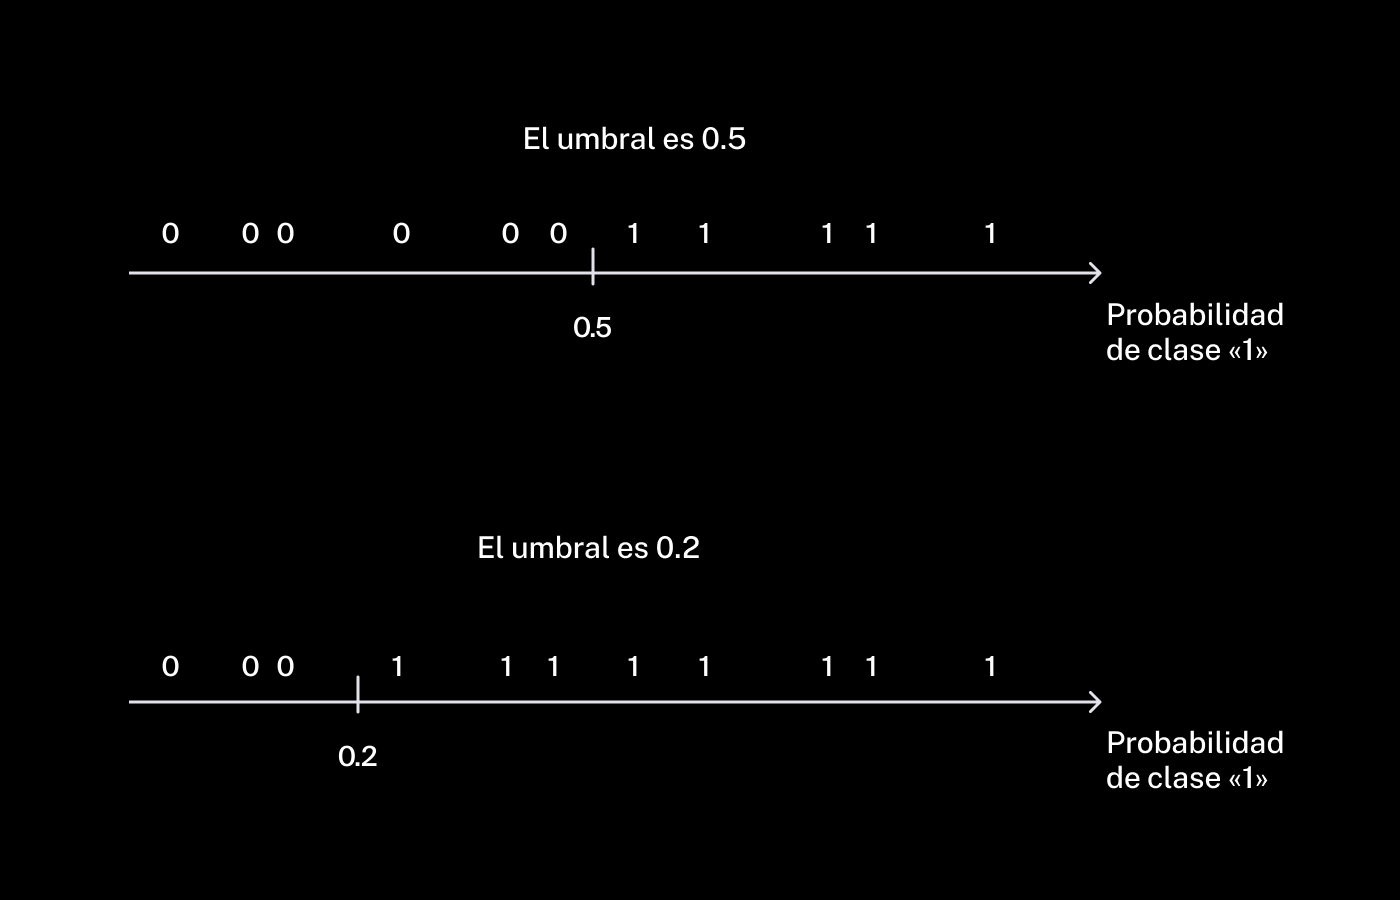


¿Cómo afecta la reducción del umbral a la precisión y a recall (sensibilidad)?
Respuesta. La precisión disminuirá, recall aumentará

Habrá más respuestas positivas.

Ajuste de umbral

A medida que cambiamos el valor del umbral, también veremos cómo cambian nuestras métricas.
En sklearn, esto se puede investigar utilizando la función predict_proba(), que proporciona la probabilidad de que cada observación pertenezca a cada clase posible. Esta función toma las características de las observaciones como entrada y devuelve un array de probabilidades para cada clase.

probabilities = model.predict_proba(features)

Así se verá el resultado si lo imprimimos: Este modelo genera dos probabilidades para cinco observaciones. La primera columna indica la probabilidad de clase negativa y la segunda indica la probabilidad de clase positiva (las dos probabilidades suman uno).

print(probabilities)

[[0.5795 0.4205]
 [0.6629 0.3371]
 [0.7313 0.2687]
 [0.6728 0.3272]
 [0.5086 0.4914]]

predict_proba() también está disponible en sklearn para árboles de decisión y bosques aleatorios.

Ejercicios

1. Encuentra las probabilidades de clase para la muestra de validación. Almacena los valores para las probabilidades de clase "1" en la variable probabilities_one_valid. Muestra en la pantalla los primeros cinco elementos de la variable (en precódigo).

Usa la función predict_proba():

probabilities_valid = # < escribe el código aquí>

probabilities_one_valid = probabilities_valid[:, 1]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('/datasets/travel_insurance_us_preprocessed.csv')

target = data['Claim']
features = data.drop('Claim', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

# < escribe el código aquí  >
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]

print(probabilities_one_valid[:5])

# [0.01855917 0.009525   0.00419783 0.00157461 0.00956259]

2. Pasa por los valores de umbral de 0 a 0.3 en intervalos de 0.02. Encuentra precisión y recall para cada valor del umbral. Muestra en pantalla los resultados (en precódigo)

Para crear un bucle con el rango deseado, usamos la función arange() de la librería numpy. Al igual que la función range(), ésta itera sobre los elementos especificados del rango, pero es diferente porque funciona con números fraccionarios además de enteros.

Para encontrar la clase deseada, compara los valores de probabilidad con el umbral:

predicted_valid = probabilities_one_valid > threshold

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

# Load data
data = pd.read_csv('/datasets/travel_insurance_us_preprocessed.csv')

# Divide features & target
target = data['Claim']
features = data.drop('Claim', axis=1)
# Divide for training and validation, 75% train, 25% validate
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

# Train the model
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
# Get probabilities and possitive class
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# Evaluate thresholds
for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold #< escribe el código aquí >
    precision = precision_score(target_valid, predicted_valid)# < escribe el código aquí >
    recall = recall_score(target_valid, predicted_valid)# < escribe el código aquí >

    print('Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}'.format(threshold, precision, recall))

Threshold = 0.00 | Precision = 0.013, Recall = 1.000
Threshold = 0.02 | Precision = 0.052, Recall = 0.645
Threshold = 0.04 | Precision = 0.061, Recall = 0.609
Threshold = 0.06 | Precision = 0.072, Recall = 0.367
Threshold = 0.08 | Precision = 0.097, Recall = 0.254
Threshold = 0.10 | Precision = 0.112, Recall = 0.178
Threshold = 0.12 | Precision = 0.146, Recall = 0.107
Threshold = 0.14 | Precision = 0.033, Recall = 0.012
Threshold = 0.16 | Precision = 0.036, Recall = 0.006
Threshold = 0.18 | Precision = 0.000, Recall = 0.000
Threshold = 0.20 | Precision = 0.000, Recall = 0.000
Threshold = 0.22 | Precision = 0.000, Recall = 0.000
Threshold = 0.24 | Precision = 0.000, Recall = 0.000
Threshold = 0.26 | Precision = 0.000, Recall = 0.000
Threshold = 0.28 | Precision = 0.000, Recall = 0.000